# OCR Practice Exercise


In [1]:
!pip install keras-ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import keras_ocr


## Download and visualize sample image


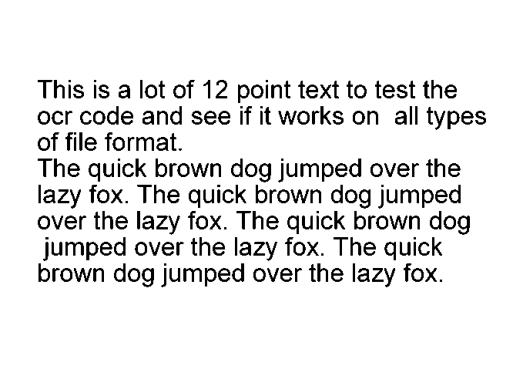

In [4]:
img_path = 'OCR_example.png'
image = cv2.imread(img_path)

plt.imshow(image)
plt.axis('off')
plt.show()

### Convert to grayscale

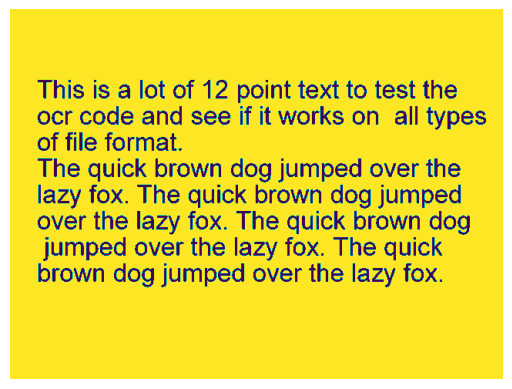

In [5]:
image_grayed = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_grayed)
plt.axis('off')
plt.show()


### Remove noise

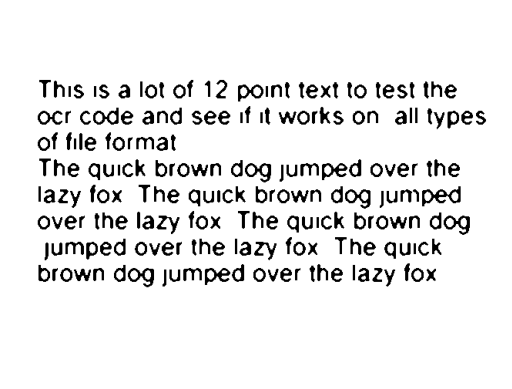

In [6]:
image_no_noise = cv2.medianBlur(image, 5)
plt.imshow(image_no_noise)
plt.axis('off')
plt.show()

### Sharpen the image

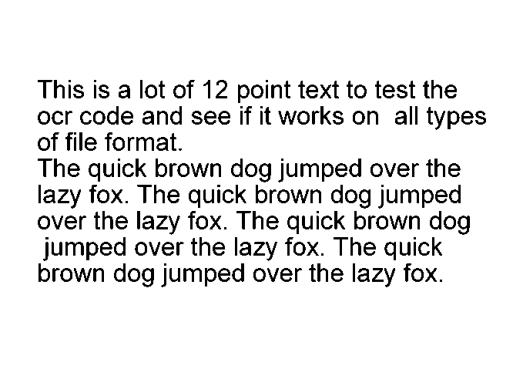

In [7]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharped_image = cv2.filter2D(image, -1, kernel)
plt.imshow(sharped_image)
plt.axis('off')
plt.show()

### Binarize the image

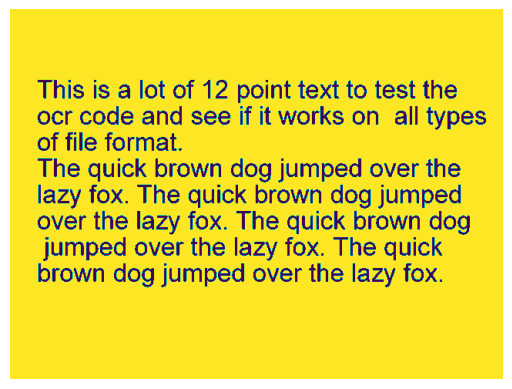

In [8]:
image_binar = cv2.threshold(image_grayed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(image_binar)
plt.axis('off')
plt.show()


## Get the OCR model using keras_ocr


In [11]:
!pip install tensorflow==2.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-ser

In [1]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [5]:
image = keras_ocr.tools.read(img_path)

images = [image]

prediction_groups = pipeline.recognize(images)

for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])

2/2 [==============================] - 4s 651ms/step
12
this
of
point
the
is
lot
text
to
test
a
code
and
if
it
works
all
types
see
ocr
on
of
format
file
the
quick
brown
dog
jumped
the
over
the
quick
dog
jumped
fox
brown
lazy
the
the
quick
dog
lazy
fox
brown
over
quick
jumped
the
the
fox
lazy
over
dog
jumped
the
fox
brown
lazy
over


## Display the OCR predictions


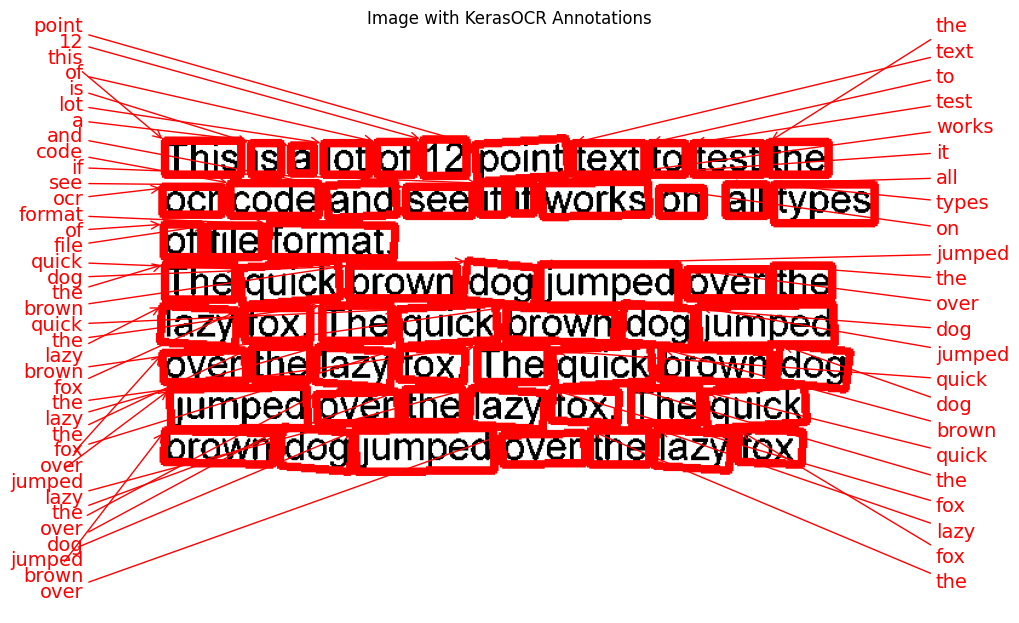

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)


plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()